## rnn 긍정/부정 이진분류

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
from keras.datasets import imdb

db = imdb.load_data(num_words=500)
db

((array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 

In [7]:
x_train, y_train = db[0]
x_test, y_test = db[1]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [11]:
review_len_train = np.array([len(x) for x in x_train])
review_len_test = np.array([len(x) for x in x_test])
display(review_len_train, review_len_test)
print(review_len_train.min(), review_len_train.max())
print(review_len_test.min(), review_len_test.max())

array([218, 189, 141, ..., 184, 150, 153])

array([ 68, 260, 603, ...,  75,  99, 172])

11 2494
7 2315


<Axes: ylabel='Count'>

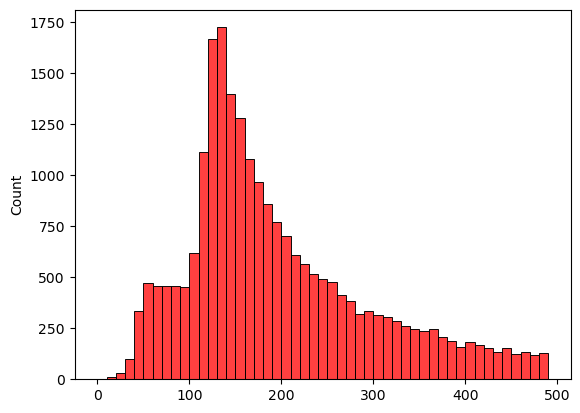

In [15]:
sns.histplot(review_len_train, bins=range(0, 500, 10), color='red')

In [18]:
from keras.utils import pad_sequences

x_train = pad_sequences(x_train, maxlen=150) # 히스토그램을 보고 150으로 설정
x_test = pad_sequences(x_test, maxlen=150)

print(x_train.shape, x_test.shape)
x_train

(25000, 150) (25000, 150)


array([[ 12,  16,  43, ...,  19, 178,  32],
       [  4, 249, 126, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [140,   8,   2, ...,   4,   2,   2],
       [  1,   2,   2, ...,  12,   9,  23],
       [194, 337,   7, ..., 204, 131,   9]], dtype=int32)

In [19]:
## 모델링

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model = Sequential([
    Embedding(500, 16, input_length=150), # 단어 하나를 16차원으로 표현 -> 이것 역시 학습을 통해 결정
    LSTM(20, activation='tanh'),
    Dense(1, activation='sigmoid') 
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 20)                2960      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 10,981
Trainable params: 10,981
Non-trainable params: 0
_________________________________________________________________


2024-01-03 15:02:34.598365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-03 15:02:34.599332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-03 15:02:34.599894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [21]:
from keras.optimizers import  RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [22]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('../save/best_model.h5', save_best_only=True)

EPOCHS = 20
BATCH_SIZE = 256
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/20


2024-01-03 15:06:09.739828: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-01-03 15:06:09.831162: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-03 15:06:09.831697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-03 15:06:09.832250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

79/79 [==============================] - ETA: 0s - loss: 0.6284 - acc: 0.6547

2024-01-03 15:06:13.620680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-03 15:06:13.621102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-03 15:06:13.621630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

79/79 [==============================] - 4s 44ms/step - loss: 0.6284 - acc: 0.6547 - val_loss: 0.5310 - val_acc: 0.7680
Epoch 2/20
79/79 [==============================] - 3s 42ms/step - loss: 0.5027 - acc: 0.7692 - val_loss: 0.4893 - val_acc: 0.7908
Epoch 3/20
79/79 [==============================] - 3s 42ms/step - loss: 0.4564 - acc: 0.7958 - val_loss: 0.4743 - val_acc: 0.7958
Epoch 4/20
79/79 [==============================] - 3s 42ms/step - loss: 0.4333 - acc: 0.8077 - val_loss: 0.4345 - val_acc: 0.8100
Epoch 5/20
79/79 [==============================] - 3s 42ms/step - loss: 0.4173 - acc: 0.8123 - val_loss: 0.5536 - val_acc: 0.7752
Epoch 6/20
79/79 [==============================] - 3s 42ms/step - loss: 0.4093 - acc: 0.8175 - val_loss: 0.4938 - val_acc: 0.7790
Epoch 7/20
79/79 [==============================] - 3s 41ms/step - loss: 0.4028 - acc: 0.8202 - val_loss: 0.5613 - val_acc: 0.7782
Epoch 8/20
79/79 [==============================] - 3s 42ms/step - loss: 0.4017 - acc: 0.8212 

2024-01-03 15:08:44.096436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-03 15:08:44.097869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-03 15:08:44.100109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

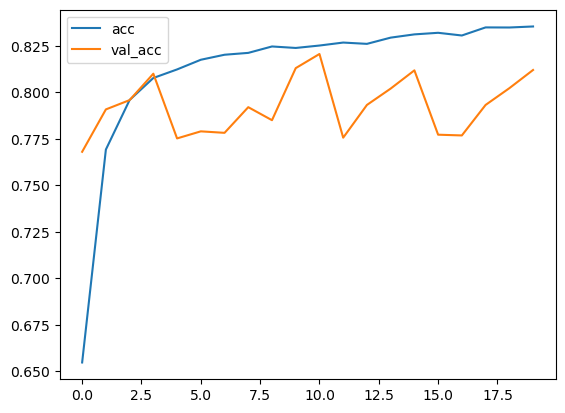

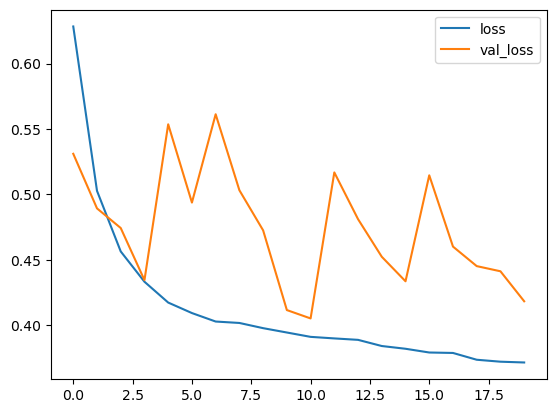

 14/782 [..............................] - ETA: 3s - loss: 0.3557 - acc: 0.8326  

2024-01-03 15:08:44.341073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-03 15:08:44.341712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-03 15:08:44.342317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

782/782 [==============================] - 3s 4ms/step - loss: 0.3940 - acc: 0.8212
0.39397624135017395 0.8212400078773499


In [25]:
model = keras.models.load_model('../save/best_model.h5')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

loss, acc = model.evaluate(x_test, y_test)
print(loss, acc)


In [27]:
sentence = 'this movie is so great'
word_to_index = imdb.get_word_index()

def encode_sentence(sentence):
    words = sentence.split()
    encoded = []
    for word in words:
        try:
            encoded.append(word_to_index[word])
        except KeyError:
            encoded.append(1)
    return encoded

def predict_pos_neg(review):
    token = encode_sentence(review)
    pad_token = pad_sequences([token], maxlen=150)
    score = float(model.predict(pad_token))
    if score > 0.5:
        print(f'{review} ==> 긍정 ({score:.3f})')
    else:
        print(f'{review} ==> 부정 ({score:.3f})')

predict_pos_neg(sentence)

1/1 [==============================] - 0s 203ms/step
this movie is so great ==> 긍정 (0.616)


2024-01-03 15:15:15.595187: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-03 15:15:15.595762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-03 15:15:15.596424: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus